<a href="https://colab.research.google.com/github/saranyapalani/sample/blob/master/saran1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import math

from folium.plugins import HeatMap
import folium

plt.style.use('seaborn')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv('/content/drive/My Drive/dataset.csv',error_bad_lines=False)
df.head()

,ID,Case Number,Date,Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05-03-2017 23:40,ROAD ACCIDENTS,APARTMENT,True,10,24.0,29.0,1154907.0,1893681.0,2017,05-10-2017 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05-03-2017 21:40,ROAD ACCIDENTS,RESIDENCE,False,3,20.0,42.0,1183066.0,1864330.0,2017,05-10-2017 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05-03-2017 23:31,PUBLIC PEACE VIOLATION,STREET,False,15,37.0,25.0,1140789.0,1904819.0,2017,05-10-2017 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05-03-2017 22:10,ROAD ACCIDENTS,SIDEWALK,False,15,28.0,25.0,1143223.0,1901475.0,2017,05-10-2017 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05-03-2017 22:00,JEWELS THEFT AND MURDER,RESIDENCE,False,15,28.0,25.0,1139890.0,1901675.0,2017,05-10-2017 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [6]:
df.columns


Index(['ID', 'Case Number', 'Date', 'Type', 'Location Description', 'Arrest',
       'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [7]:
df.shape

(499999, 16)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    499999 non-null  int64  
 1   Case Number           499999 non-null  object 
 2   Date                  499999 non-null  object 
 3   Type                  499999 non-null  object 
 4   Location Description  499559 non-null  object 
 5   Arrest                499999 non-null  bool   
 6   District              499999 non-null  int64  
 7   Ward                  499990 non-null  float64
 8   Community Area        499959 non-null  float64
 9   X Coordinate          492648 non-null  float64
 10  Y Coordinate          492648 non-null  float64
 11  Year                  499999 non-null  int64  
 12  Updated On            499999 non-null  object 
 13  Latitude              492648 non-null  float64
 14  Longitude             492648 non-null  float64
 15  

In [9]:
np.count_nonzero(data.isnull())

37244

In [10]:
df.dropna(how='any', axis=0, inplace=True)
np.count_nonzero(df.isnull())

0

In [11]:
df['Location']

0         (41.864073157, -87.706818608)
1          (41.782921527, -87.60436317)
2         (41.894908283, -87.758371958)
3         (41.885686845, -87.749515983)
4         (41.886297242, -87.761750709)
                      ...              
499994     (41.987870213, -87.66019784)
499995    (41.722768379, -87.624410361)
499996    (41.764268496, -87.643003179)
499997    (41.656764077, -87.547138923)
499998    (41.890781894, -87.719841858)
Name: Location, Length: 492215, dtype: object

In [0]:
df.drop(['Location'], axis=1, inplace=True)

In [13]:
print('Current rows:', df.shape[0])
df = df[(((df.Latitude >= 41.64) & (df.Longitude <= -87.50)) | 
            ((df.Latitude <= 41.94) & (df.Longitude >= -87.94)))]
print('Rows after removing out of box points:', df.shape[0])


Current rows: 492215
Rows after removing out of box points: 492189


In [14]:
df[['X Coordinate', 'Y Coordinate']].describe()

,X Coordinate,Y Coordinate
count,4.921890e+05,4.921890e+05
mean,1.164456e+06,1.885484e+06
std,1.636326e+04,3.145288e+04
min,1.092706e+06,1.813894e+06
25%,1.152481e+06,1.858720e+06
50%,1.165919e+06,1.890783e+06
75%,1.176352e+06,1.909030e+06
max,1.205119e+06,1.951527e+06


In [0]:
Groups = df.groupby(df['Type'])
Groups = dict(list(Groups))
data = [Groups['JEWELS THEFT AND MURDER']]
data = pd.concat(data, axis = 0)
del Groups
del df

In [17]:
print('Current rows:', data.shape[0])
data[['X Coordinate', 'Y Coordinate']] = data[['X Coordinate', 'Y Coordinate']].replace(0.0, np.nan)
data.dropna(inplace=True)


Current rows: 107955


In [18]:
print('Rows after removing errorneous coords:', data.shape[0])


Rows after removing errorneous coords: 107955


In [0]:
data.drop(['Updated On'], axis=1, inplace=True)

In [20]:
print('Range of dates: {} to {}'.format(data.Date.min(), data.Date.max()))

Range of dates: 01-01-2015 00:00 to 12/31/2018 12:50:00 AM


In [21]:
print('Range of year: {} to {}'.format(data.Year.min(), data.Year.max()))


Range of year: 2014 to 2019


In [23]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y %H:%M:%S')
data.head()

,ID,Case Number,Date,Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
4,10508699,HZ250455,2017-05-03 22:00:00,JEWELS THEFT AND MURDER,RESIDENCE,False,15,28.0,25.0,1139890.0,1901675.0,2017,41.886297,-87.761751
12,10508717,HZ250415,2017-05-03 17:30:00,JEWELS THEFT AND MURDER,OTHER,False,12,2.0,28.0,1168776.0,1898793.0,2017,41.877812,-87.655758
13,10508724,HZ250513,2017-05-03 09:00:00,JEWELS THEFT AND MURDER,STREET,False,1,4.0,35.0,1179375.0,1886199.0,2017,41.843017,-87.617227
14,10508728,HZ250505,2017-05-03 22:08:00,JEWELS THEFT AND MURDER,STREET,False,14,1.0,24.0,1160444.0,1910787.0,2017,41.910901,-87.686019
16,10508738,HZ250440,2017-05-03 21:45:00,JEWELS THEFT AND MURDER,STREET,False,14,1.0,24.0,1162515.0,1909832.0,2017,41.908237,-87.678437


In [0]:
data.index = pd.DatetimeIndex(data.Date)

In [25]:
print('Current rows:', data.shape[0])
data = data[data.index.year == data.Year]
print('Rows after removing mismatch:', data.shape[0])


Current rows: 107955
Rows after removing mismatch: 107783


In [0]:
data['Month'] = data.index.month
data['dayOfWeek'] = data.index.dayofweek
data['dayOfMonth'] = data.index.day
data['dayOfYear'] = data.index.dayofyear
data['weekOfMonth'] = data.dayOfMonth.apply(lambda d: (d - 1) // 7 + 1)

dayOfYear = list(data.index.dayofyear)

weekOfYear = [math.ceil(i/7) for i in dayOfYear]
data['weekOfYear'] = weekOfYear

In [27]:
print('Current rows:', data.shape[0])
data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Rows after deduplication:', data.shape[0])

Current rows: 107783
Rows after deduplication: 107783


In [0]:
data.drop(['ID', 'Case Number'], axis=1, inplace=True)

In [29]:
data.Arrest.value_counts()


False    95363
True     12420
Name: Arrest, dtype: int64

In [30]:
data.Arrest = data.Arrest.astype(int)
data.Arrest.value_counts()

0    95363
1    12420
Name: Arrest, dtype: int64

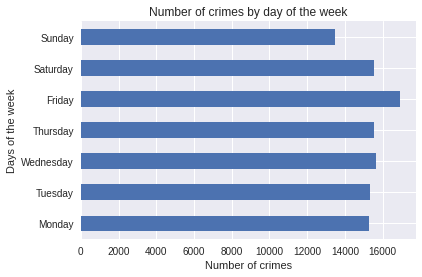

In [31]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby([data.dayOfWeek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

In [32]:
data.dayOfWeek.value_counts(normalize=True)

4    0.156861
2    0.144995
3    0.144457
5    0.144336
1    0.142360
0    0.141785
6    0.125205
Name: dayOfWeek, dtype: float64

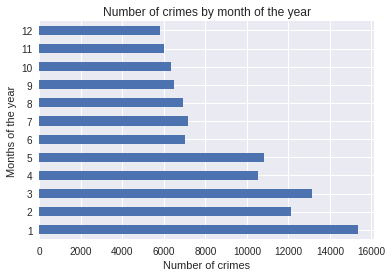

In [33]:
data.groupby([data.Month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

In [34]:
data.Month.value_counts(normalize=True)

1     0.142564
3     0.121995
2     0.112559
5     0.100572
4     0.097668
7     0.066550
6     0.064871
8     0.064389
9     0.060334
10    0.058720
11    0.055899
12    0.053877
Name: Month, dtype: float64

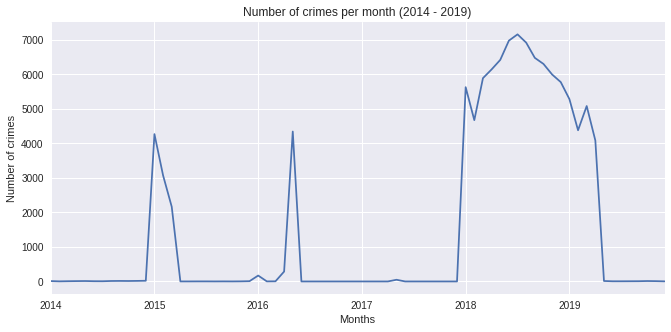

In [36]:
plt.figure(figsize=(11,5))
data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2014 - 2019)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()


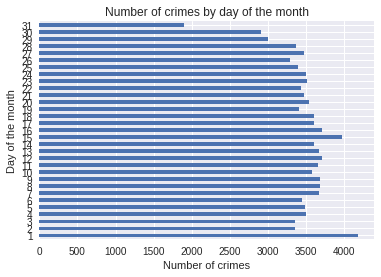

In [37]:
data.groupby([data.dayOfMonth]).size().plot(kind='barh')
plt.ylabel('Day of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the month')
plt.show()

In [38]:
data.dayOfMonth.value_counts(normalize=True)

1     0.038884
15    0.036917
12    0.034505
16    0.034458
8     0.034263
9     0.034161
7     0.034124
13    0.034059
11    0.033911
14    0.033540
18    0.033447
17    0.033438
10    0.033243
20    0.032844
23    0.032658
24    0.032556
4     0.032500
5     0.032343
21    0.032306
27    0.032231
6     0.032018
22    0.031851
19    0.031647
25    0.031536
28    0.031229
3     0.031109
2     0.031109
26    0.030515
29    0.027926
30    0.027027
31    0.017647
Name: dayOfMonth, dtype: float64

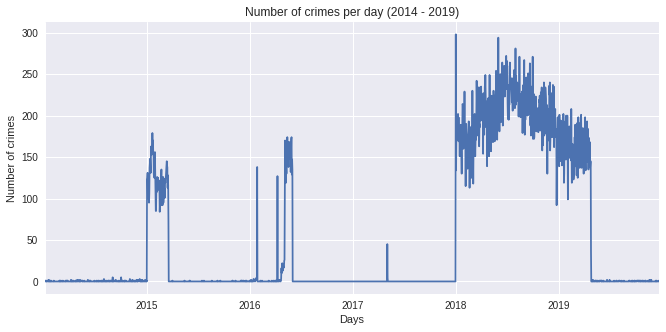

In [40]:
plt.figure(figsize=(11,5))
data.resample('D').size().plot(legend=False)
plt.title('Number of crimes per day (2014 - 2019)')
plt.xlabel('Days')
plt.ylabel('Number of crimes')
plt.show()


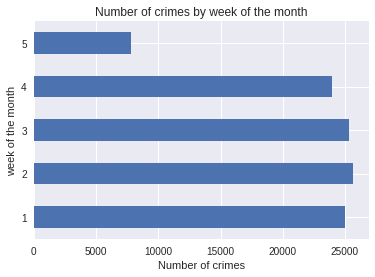

In [41]:
data.groupby([data.weekOfMonth]).size().plot(kind='barh')
plt.ylabel('week of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by week of the month')
plt.show()


In [42]:
data.weekOfMonth.value_counts(normalize=True)

2    0.237681
3    0.235056
1    0.232087
4    0.222577
5    0.072600
Name: weekOfMonth, dtype: float64

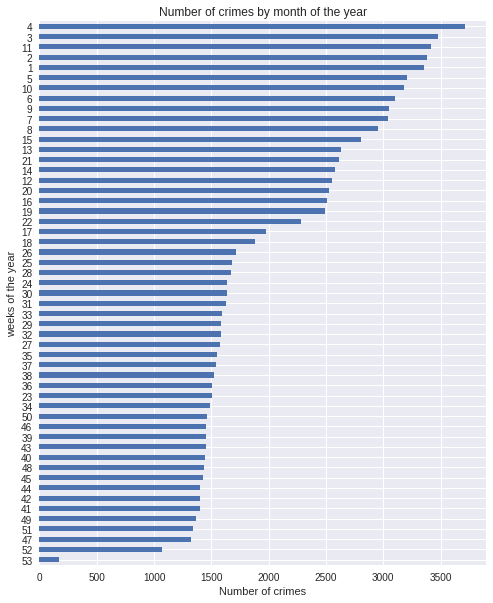

In [43]:
plt.figure(figsize=(8,10))
data.groupby([data.weekOfYear]).size().sort_values().plot(kind='barh')
plt.ylabel('weeks of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()


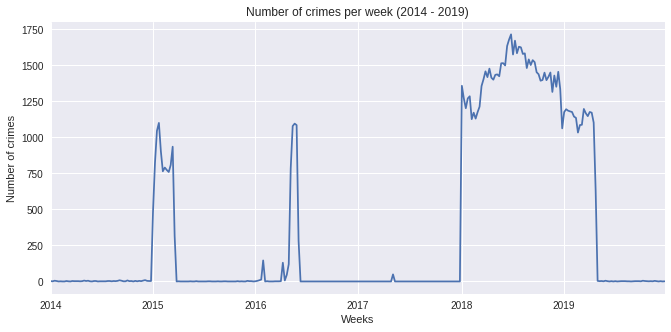

In [44]:
plt.figure(figsize=(11,5))
data.resample('W').size().plot(legend=False)
plt.title('Number of crimes per week (2014 - 2019)')
plt.xlabel('Weeks')
plt.ylabel('Number of crimes')
plt.show()


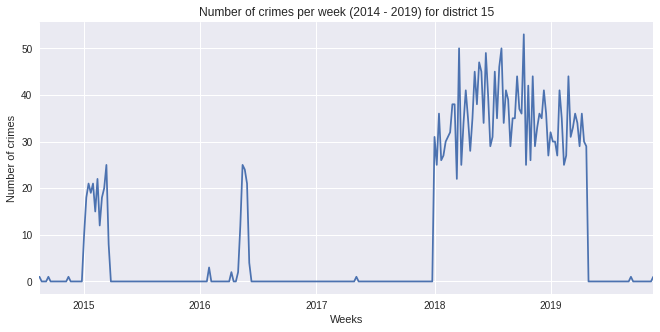

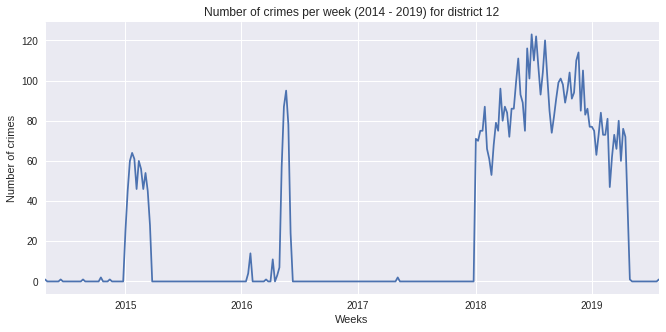

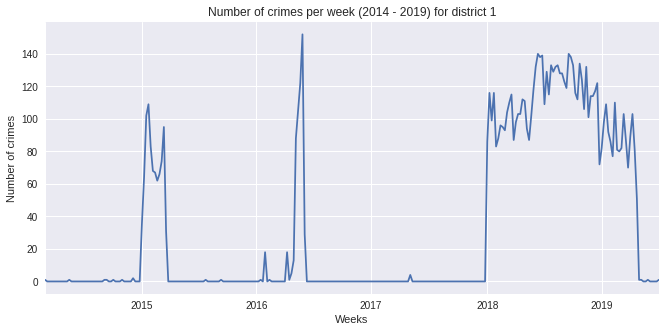

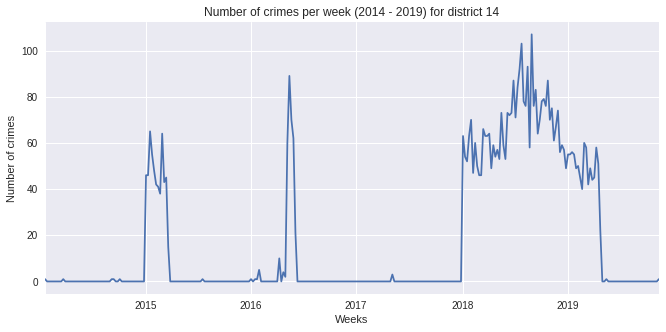

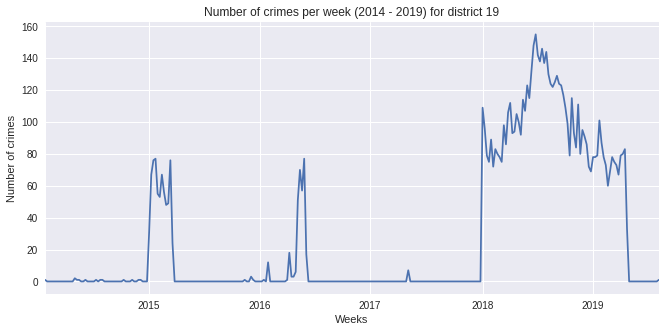

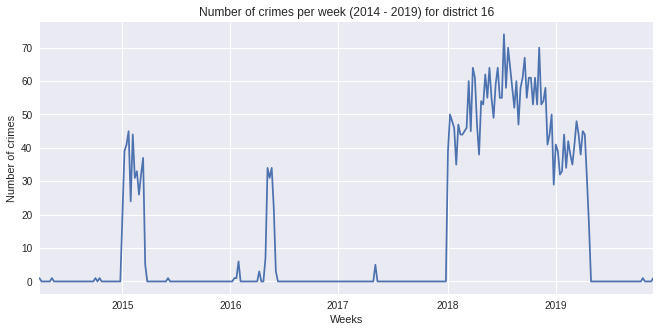

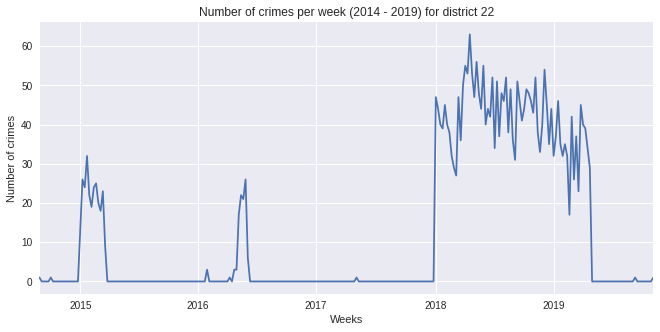

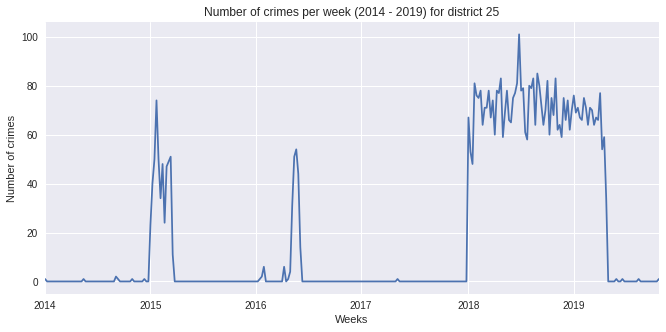

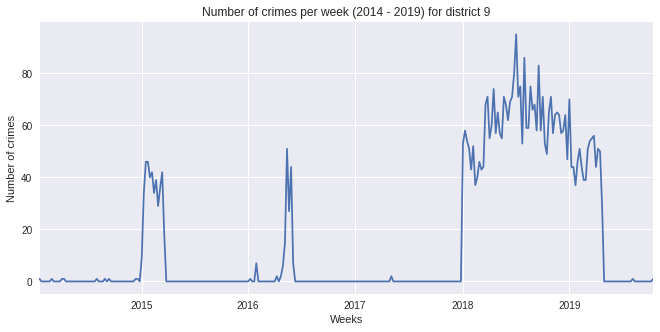

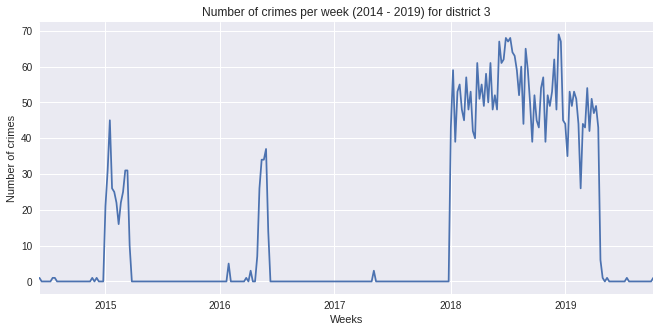

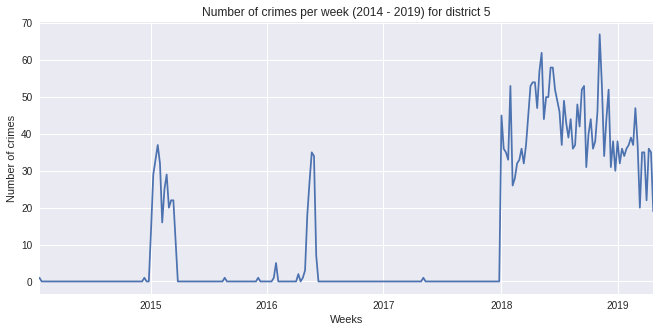

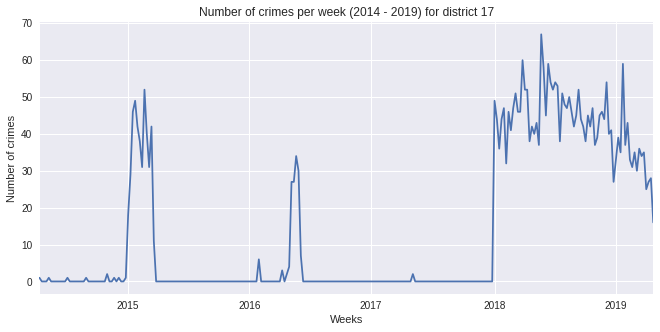

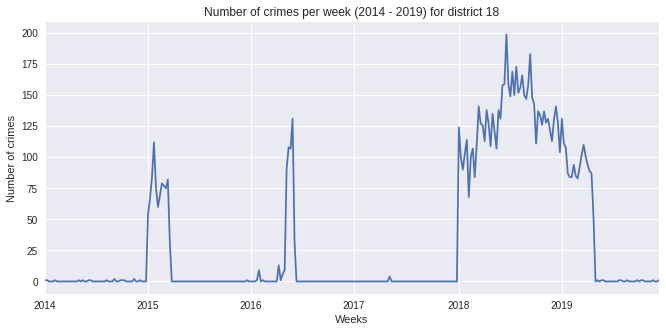

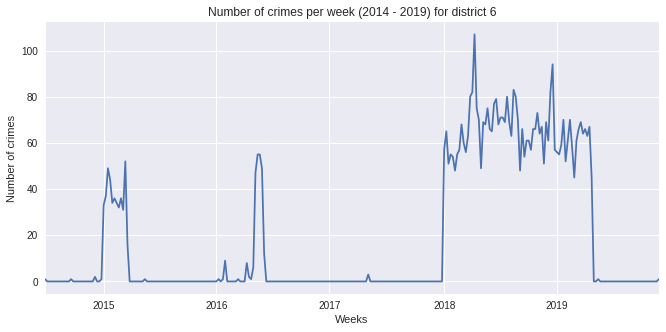

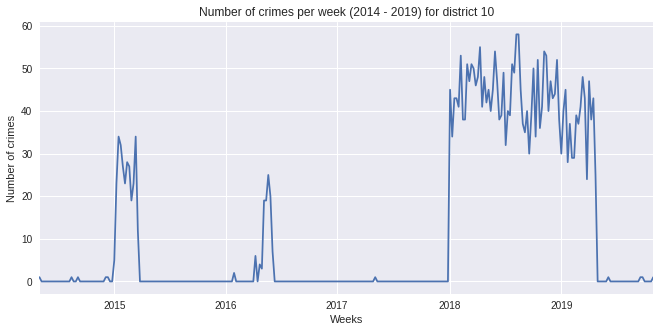

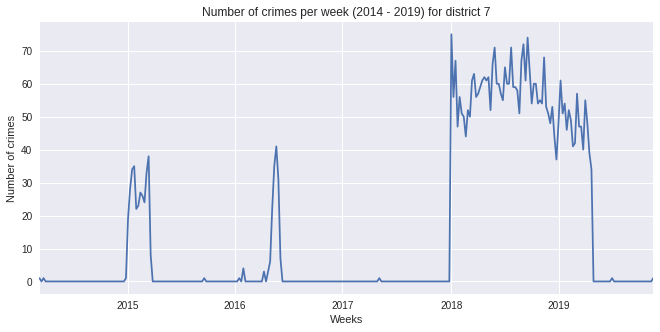

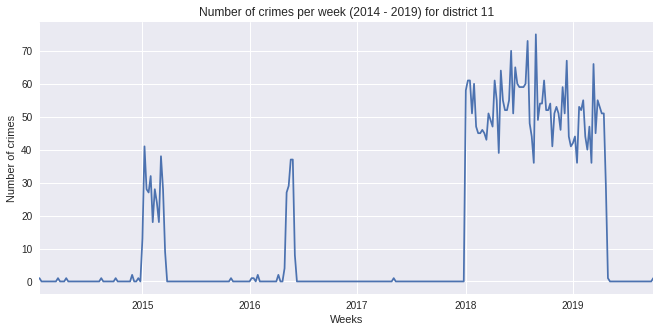

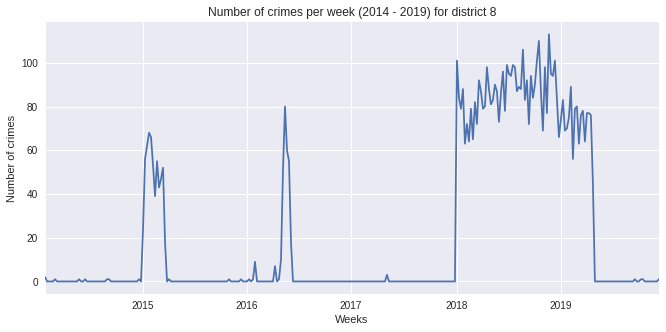

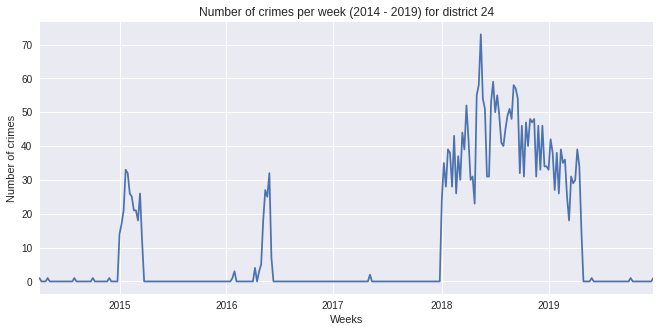

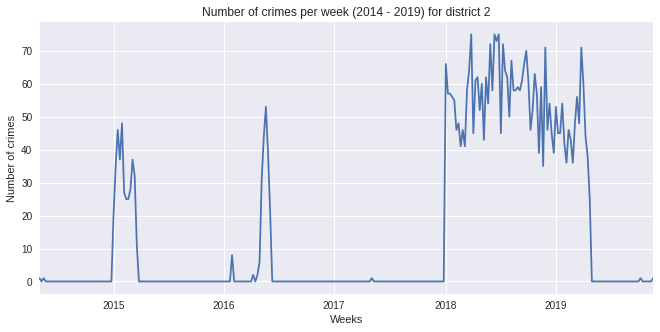

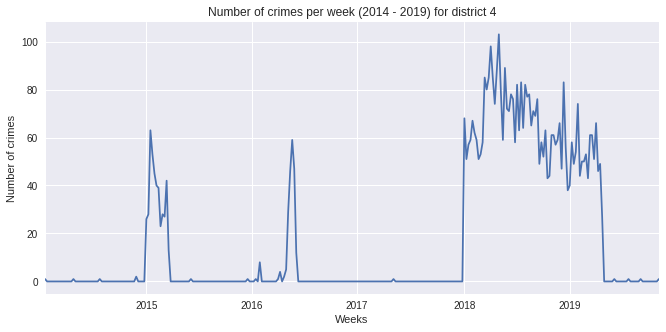

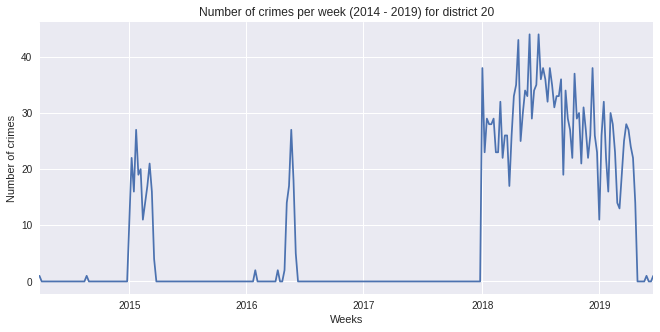

In [46]:
listOfDistricts = list(data['District'].unique())

for district in listOfDistricts:
    df = data[data['District'] == district]
    plt.figure(figsize=(11,5))
    df.resample('W').size().plot(legend=False)
    plt.title('Number of crimes per week (2014 - 2019) for district {}'.format(district))
    plt.xlabel('Weeks')
    plt.ylabel('Number of crimes')
    plt.show()

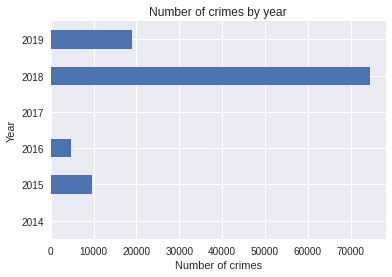

In [47]:
data.groupby([data.Year]).size().plot(kind='barh')
plt.ylabel('Year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by year')
plt.show()


In [48]:
data.Year.value_counts(normalize=True)


2018    0.690016
2019    0.175287
2015    0.088391
2016    0.044617
2014    0.001234
2017    0.000455
Name: Year, dtype: float64

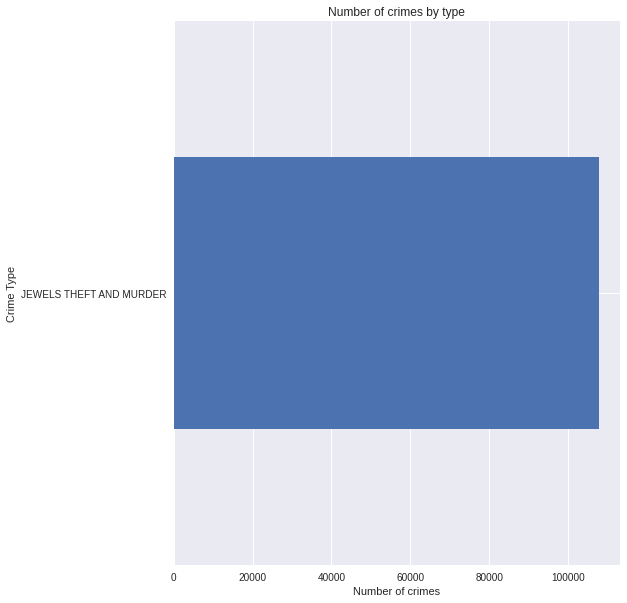

In [50]:
plt.figure(figsize=(8,10))
data.groupby([data['Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()


In [68]:
data['Type'].value_counts(normalize=True)

JEWELS THEFT AND MURDER    1.0
Name: Type, dtype: float64

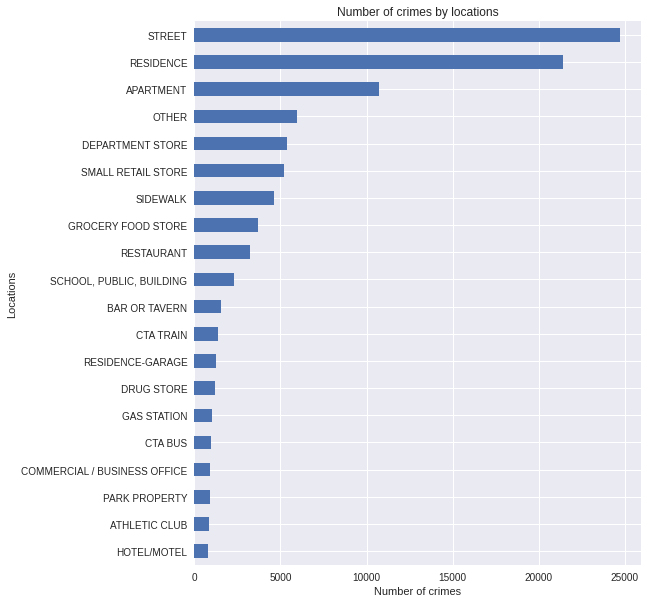

In [69]:
plt.figure(figsize=(8,10))
data.groupby([data['Location Description']]).size().sort_values(ascending=True)[-70:].plot(kind='barh')
plt.title('Number of crimes by locations')
plt.ylabel('Locations')
plt.xlabel('Number of crimes')
plt.show()


In [0]:
#top50Locations = list(data.groupby([data['Location Description']]).size().sort_values(ascending=True)[-50:].index)

In [66]:
#print('Current rows:', data.shape[0])
#data = data[data['Location Description'].isin(top0Locations)]
#print('Rows after removing location outliers:', data.shape[0])


Current rows: 98082
Rows after removing location outliers: 98082


In [67]:
#data['Location Description'].value_counts()


STREET                          24706
RESIDENCE                       21418
APARTMENT                       10740
OTHER                            5980
DEPARTMENT STORE                 5407
SMALL RETAIL STORE               5185
SIDEWALK                         4600
GROCERY FOOD STORE               3696
RESTAURANT                       3247
SCHOOL, PUBLIC, BUILDING         2324
BAR OR TAVERN                    1567
CTA TRAIN                        1386
RESIDENCE-GARAGE                 1229
DRUG STORE                       1191
GAS STATION                      1048
CTA BUS                           961
COMMERCIAL / BUSINESS OFFICE      902
PARK PROPERTY                     881
ATHLETIC CLUB                     818
HOTEL/MOTEL                       796
Name: Location Description, dtype: int64

In [0]:
#plt.figure(figsize=(8,10))
#data.groupby([data['Description']]).size().sort_values(ascending=True)[-110:].plot(kind='barh')
#plt.title('Number of crimes by description')
#plt.ylabel('Descriptions')
#plt.xlabel('Number of crimes')
#plt.show()


In [0]:
map_osm = folium.Map(location=[41.881832, -87.623177], tiles='Stamen Toner')
samplePoints = data.sample(n = 100, random_state = 42)
for i,j in samplePoints.iterrows():
    folium.Marker(list((j['Latitude'],j['Longitude']))).add_to(map_osm)


In [71]:
map_osm

Text(0.5, 1.0, 'All Crime Distribution per District')

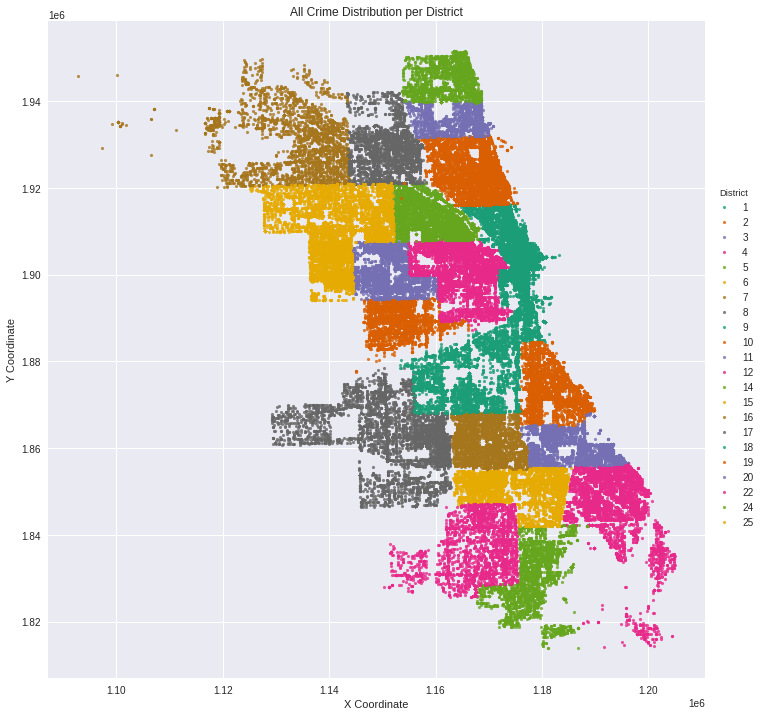

In [72]:
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=data[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           height=10,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")


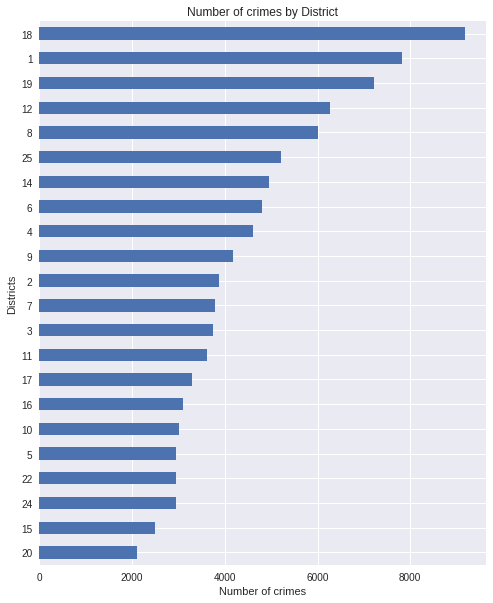

In [73]:
plt.figure(figsize=(8,10))
data.groupby([data['District']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by District')
plt.ylabel('Districts')
plt.xlabel('Number of crimes')
plt.show()


In [0]:
#data[data['District'] == 31.0].shape[0]

AttributeError: ignored

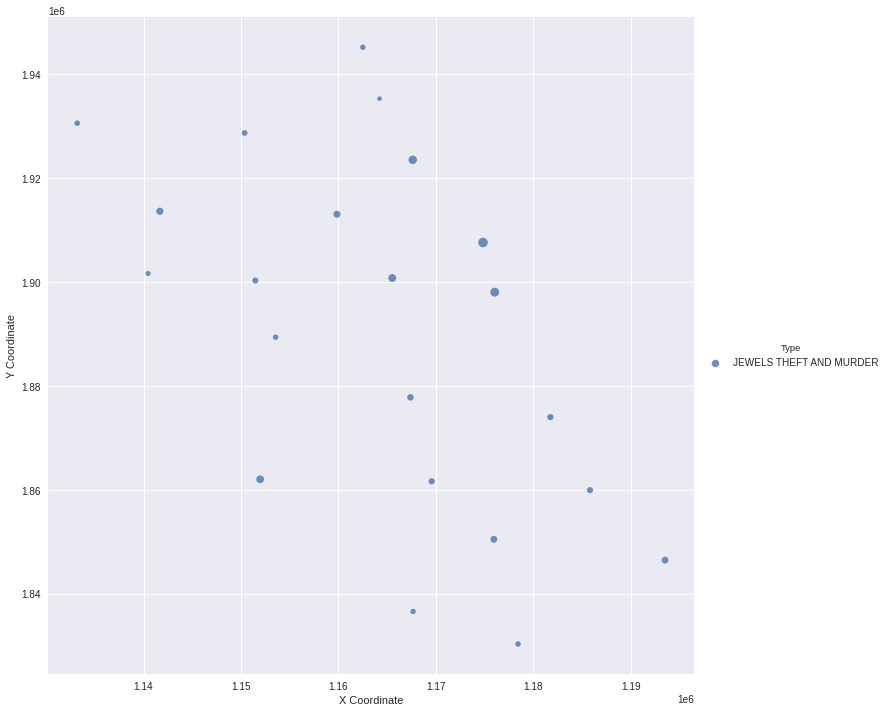

In [76]:
sdf = data.groupby(['District', 'Type']).size().reset_index(name='counts')
idx = sdf.groupby(['District'])['counts'].transform(max) == sdf['counts']
sdf = sdf[idx]
other = data.groupby('District')[['X Coordinate', 'Y Coordinate']].mean()

sdf = sdf.set_index('District').join(other)
sdf = sdf.reset_index().sort_values("counts",ascending=False)
sns.lmplot(x='X Coordinate', y='Y Coordinate',height=10, hue='Type', data=sdf,scatter_kws={"s": sdf['counts'].apply(lambda x: x/100.0)}, fit_reg=False)

for r in sdf.reset_index().as_matrix():

    district = "District {0}, Count : {1}".format(int(r[1]),int(r[3]))
    x = r[4]
    y = r[5]
    plt.annotate(
        district,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


Text(0.5, 1.0, 'All Crime Distribution per Community Area')

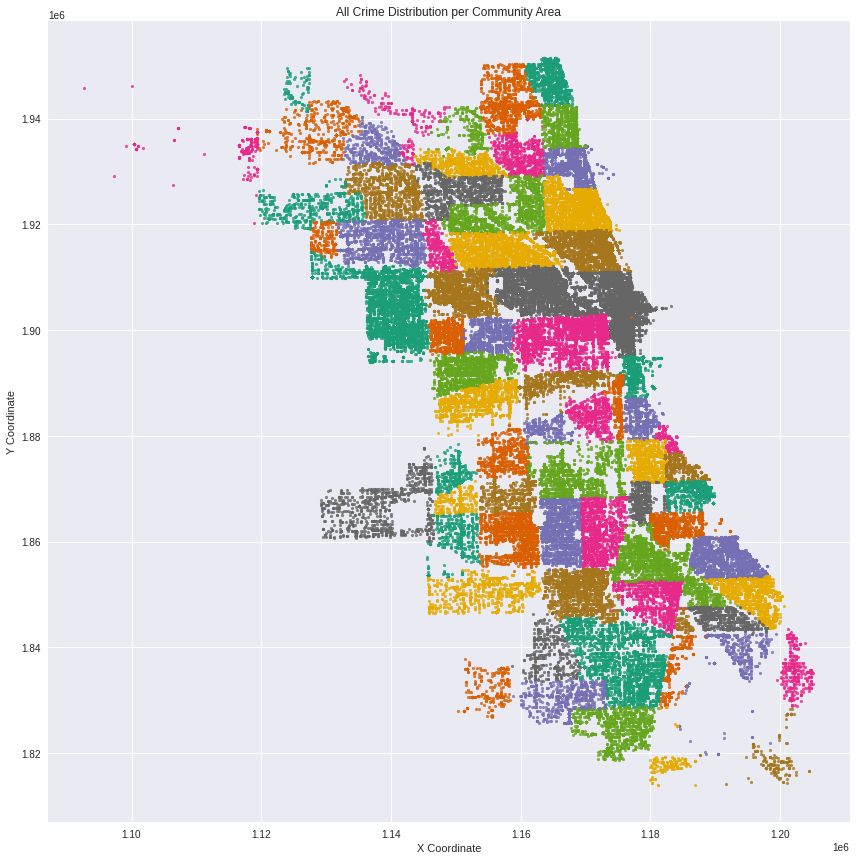

In [77]:
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=data[:],
           fit_reg=False, 
           hue="Community Area",
           palette='Dark2',
           legend=False,
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per Community Area")


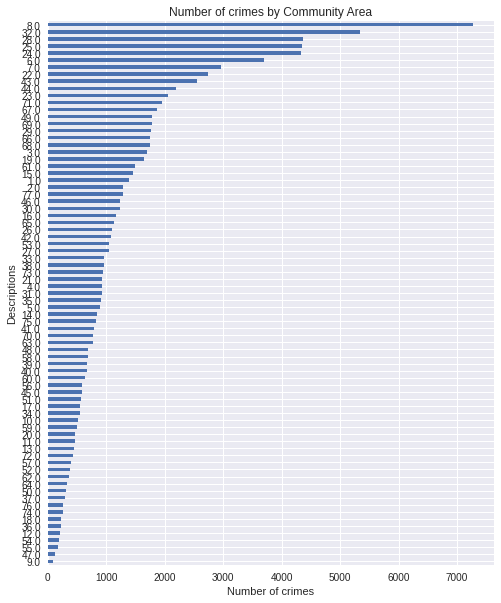

In [78]:
plt.figure(figsize=(8,10))
data.groupby([data['Community Area']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Community Area')
plt.ylabel('Descriptions')
plt.xlabel('Number of crimes')
plt.show()


In [79]:
print('Current rows:', data.shape[0])
data = data[data['Community Area'] != 0.0]
print('Rows after removing description outliers:', data.shape[0])


Current rows: 98082
Rows after removing description outliers: 98082


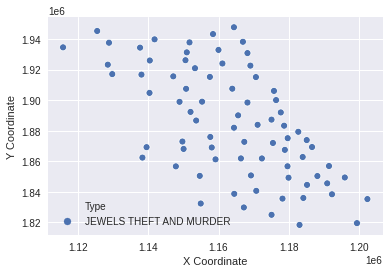

In [80]:
sdf = data.groupby(['Community Area', 'Type']).size().reset_index(name='counts')
idx = sdf.groupby(['Community Area'])['counts'].transform(max) == sdf['counts']
sdf = sdf[idx]
other = data.groupby('Community Area')[['X Coordinate', 'Y Coordinate']].mean()

sdf = sdf.set_index('Community Area').join(other)
sdf = sdf.reset_index().sort_values("counts",ascending=False)
sns.scatterplot(x='X Coordinate', y='Y Coordinate', hue='Type', data=sdf)


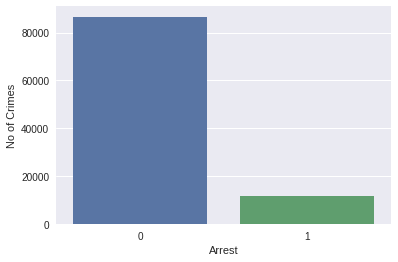

In [81]:
sns.countplot(x='Arrest',data=data)
plt.ylabel('No of Crimes')
plt.show()


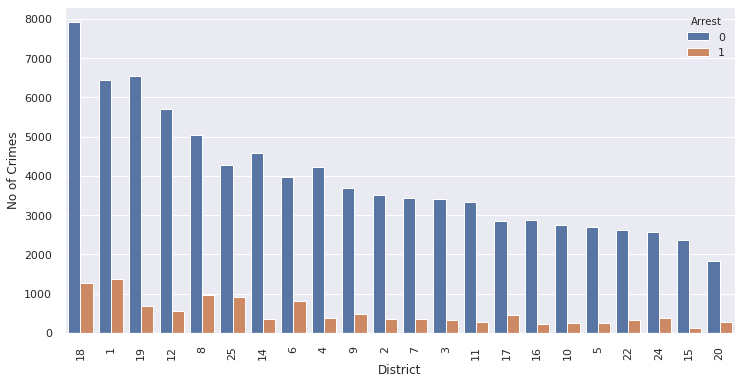

In [82]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='District',hue='Arrest',data=data,order=data['District'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()
